In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [104]:
# Eksik değer kontrolü
print("Eksik değer var mı?")
print(data.isnull().sum())

# Gözlemler
print("\nVeri tipi kontrolü:")
print(data.dtypes)

# Kategorik değişkenleri sayısal hale getirme
label_cols = ['Case Type', 'Plaintiff’s Reputation', 'Defendant’s Violation', 'Settlement Offered']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])


Eksik değer var mı?
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
Case Type_Commercial          0
Case Type_Criminal            0
dtype: int64

Veri tipi kontrolü:
Case Duration (Days)          int64
Judge Experience (Years)      int64
Number of Witnesses           int64
Legal Fees (USD)              int64
Plaintiff's Reputation        int64
Defendant's Wealth (USD)      int64
Number of Evidence Items      int64
Number of Legal Precedents    int64
Settlement Offered (USD)      int64
Severity                      int64
Outcome                       int64
Case Type_Commercial           bool
Case Type_Criminal             bool
dtype: object


KeyError: 'Case Type'

In [106]:
# 'Outcome' hedef değişken, diğerleri bağımsız değişkenler
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [112]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [114]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[60]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score:
1.0


C:\Users\HELEN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


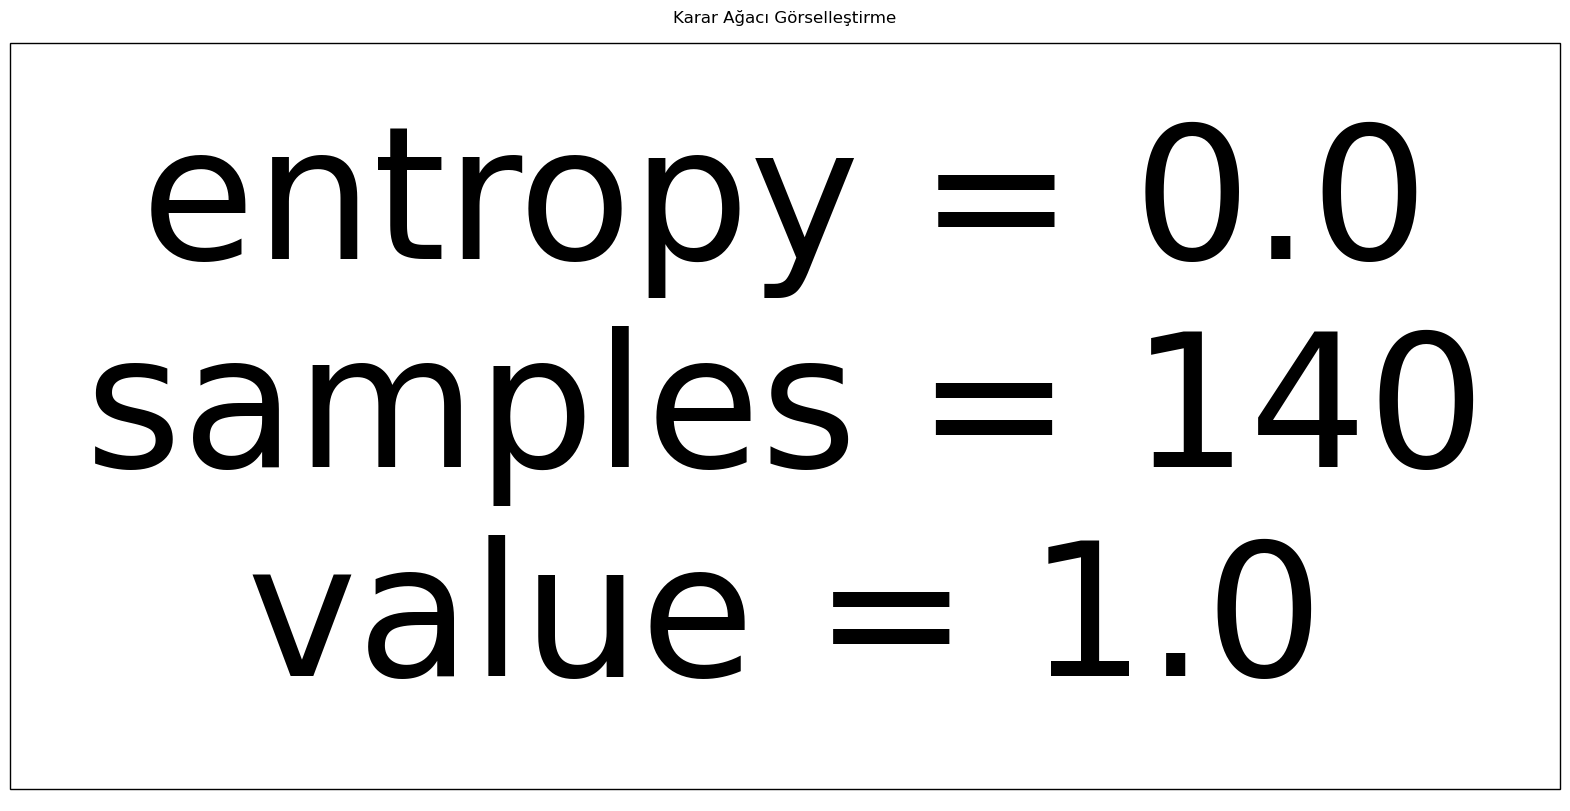

In [116]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Kaybetti', 'Kazandı'], filled=True)
plt.title("Karar Ağacı Görselleştirme")
plt.show()


In [118]:
# Örnek veriyle tahmin (rastgele bir satır)
sample = X_test[0].reshape(1, -1)
result = model.predict(sample)
print("Tahmin Sonucu:", "Kazandı" if result[0] == 1 else "Kaybetti")


Tahmin Sonucu: Kaybetti


 Karar Ağacı Nasıl Çalışır?
Karar ağacı, bir durumu adım adım sorularla değerlendirerek sonuca ulaşan bir modeldir. Örneğin, “Davacının itibarı yüksek mi?” gibi sorular sorarak veriyi dallara ayırır ve sonunda davanın kazanılıp kazanılmayacağını tahmin eder.

 En Etkili Özellikler
Model, bazı özelliklere daha fazla önem verir. Bu projede en etkili olanlar: davacının itibarı, tanık sayısı, anlaşma olup olmaması ve davanın ciddiyeti gibi faktörlerdir.

 Sonuç
Karar ağacı, anlaşılır ve görselleştirilebilir bir modeldir. Bu proje sayesinde, dava verilerine bakarak sonucu tahmin eden bir sistem oluşturulmuştur.